<a href="https://colab.research.google.com/github/Etinuz/Courses-DL1/blob/master/Lesson_1_CV_Painters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please  turn on GPU in Colab!!

**Competition **
- try to get the built the most accurate model
- change the settings of learning rate, model
- make some predictions





# Lesson 1 CV - Painters

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

This notebook is based on the lesson 1 Pets notebook of FastAI Course  v3 part 1. 

## Download the images

First we will  download the  images which are in a zip file.

I downloaded these  paintings from Rembrandt, Van Gogh, Vermeer and Leonardo with the google method for downloading, so there is some noise in this dataset. Just like the real world :-)



In [0]:
from fastai import *
from fastai.vision import *

In [2]:
!wget https://www.dropbox.com/s/17d196qi7wrtc8a/painters.zip?dl=0

--2019-03-03 16:14:51--  https://www.dropbox.com/s/17d196qi7wrtc8a/painters.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/17d196qi7wrtc8a/painters.zip [following]
--2019-03-03 16:14:51--  https://www.dropbox.com/s/raw/17d196qi7wrtc8a/painters.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbf8d496c731fc290e328f5c9e2.dl.dropboxusercontent.com/cd/0/inline/Acbj1PqSFMkRDlSewG3neXzRGXyaYmiW6Q4hAQwBxq2XwAdr_QwDK281ARLrJCUZ4Yqx8SdkE2BOWKIaTHR_3lP3DDWFNHsoGymqs_aPi698Z1iA41PFJAoA0eS7gBV-bB8/file# [following]
--2019-03-03 16:14:52--  https://ucbf8d496c731fc290e328f5c9e2.dl.dropboxusercontent.com/cd/0/inline/Acbj1PqSFMkRDlSewG3neXzRGXyaYmiW6Q4hAQwBxq2XwAdr_QwDK281ARLrJCUZ4Yqx8SdkE2BOWKIaTHR_3lP3DDWFNHsoGymqs_aPi6

In [3]:
!unzip painters.zip?dl=0

Archive:  painters.zip?dl=0
   creating: leonardo/
  inflating: leonardo/00000005.jpg   
  inflating: leonardo/00000007.jpg   
  inflating: leonardo/00000002.jpg   
  inflating: leonardo/00000009.jpg   
  inflating: leonardo/00000010.jpg   
  inflating: leonardo/00000011.jpg   
  inflating: leonardo/00000012.jpg   
  inflating: leonardo/00000013.jpg   
  inflating: leonardo/00000016.jpg   
  inflating: leonardo/00000015.jpg   
  inflating: leonardo/00000017.jpg   
  inflating: leonardo/00000019.jpg   
  inflating: leonardo/00000020.jpg   
  inflating: leonardo/00000008.jpg   
  inflating: leonardo/00000021.jpg   
  inflating: leonardo/00000022.jpg   
  inflating: leonardo/00000023.jpg   
  inflating: leonardo/00000024.jpg   
  inflating: leonardo/00000025.jpg   
  inflating: leonardo/00000006.jpg   
  inflating: leonardo/00000001.jpg   
  inflating: leonardo/00000027.jpg   
  inflating: leonardo/00000018.jpg   
  inflating: leonardo/00000014.jpg   
  inflating: leonardo/00000030.jpg   

In [0]:
classes = ['rembrandt','vermeer','vincent', 'leonardo']

In [0]:
path = '../content/'

In [6]:
ls

 download-all            models/              submission.csv      tmp_lm
 download-all.1         'painters.zip?dl=0'   test/               train.csv
 gender_submission.csv   rembrandt/           test.csv            vermeer/
 kaggle.json             sample_data/        'titanic.zip?dl=0'   vincent/
 leonardo/              'spam.zip?dl=0'       tmp_clas


In [0]:
#for c in classes:
 #  print(c)
  # verify_images(path/c, delete=True, max_workers=8)

## Building the databunch

In [0]:
#here you can do data augmentation. Create more labelled images to train on by zooming, rotating or flipping. Jeremy will explain this later.
#you can change these settings
tfms = get_transforms(flip_vert=False, max_rotate=2., max_zoom=.5,  max_lighting=0.10, max_warp=0.  )


In [0]:
batchsize = 32 #you can play with this one as long as it fits into your memory if you run out of CUDA memory make this smaller
validation_percentage = 0.2

In [10]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=validation_percentage, ds_tfms=tfms, size=224, num_workers=4, bs=batchsize, classes=classes)

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:498: UserWarning: You are labelling your items with CategoryList.
Your train set contained the following unknown labels, the corresponding items have been discarded.
test
  if getattr(ds, 'warn', False): warn(ds.warn)
/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:498: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
test
  if getattr(ds, 'warn', False): warn(ds.warn)


Good! Let's take a look at some of our pictures then.

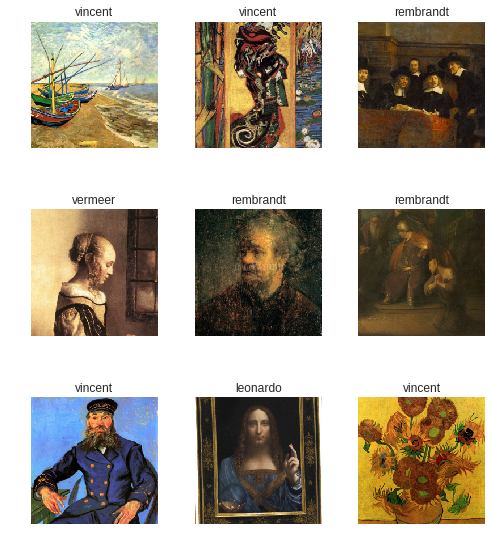

In [11]:
data.show_batch(rows=3, figsize=(7,8))

In [12]:
# take a look at the numbers. How many data is in your training and validation set
data.classes, len(data.train_ds), len(data.valid_ds)

(['rembrandt', 'vermeer', 'vincent', 'leonardo'], 619, 153)

In [0]:
def _plot(i,j,ax):
    x,y = data.train_ds[3]
    x.show(ax, y=y)

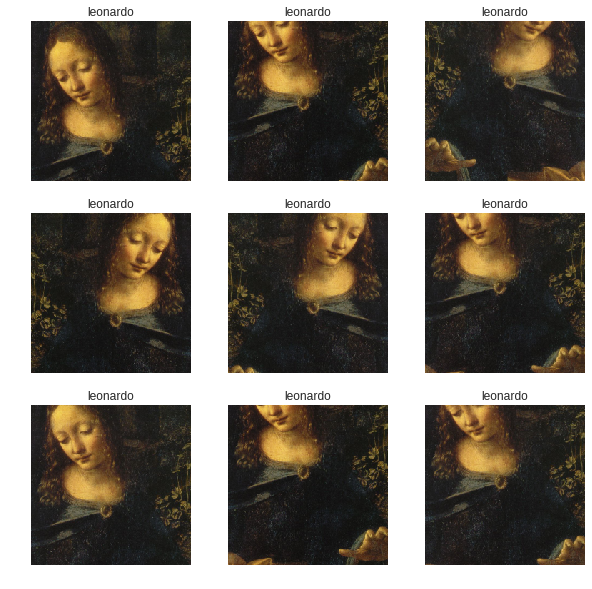

In [14]:
#let's take a look at the transform results
plot_multi(_plot, 3, 3, figsize=(10,10)) 

## Train model

It's your turn :-)  

Try to improve the accuracy of the model. You can think of:
- changing the model (i.e. resnet152)
- more epochs 
- different learning rate
- ..

In [0]:
#you can try another model
model = models.resnet50  

In [34]:
learn = create_cnn(data, model, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 93396865.61it/s]


In [35]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
1,0.675788,0.361056,0.869281,01:07


In [0]:
# all layers now trainable
learn.unfreeze()

In [37]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


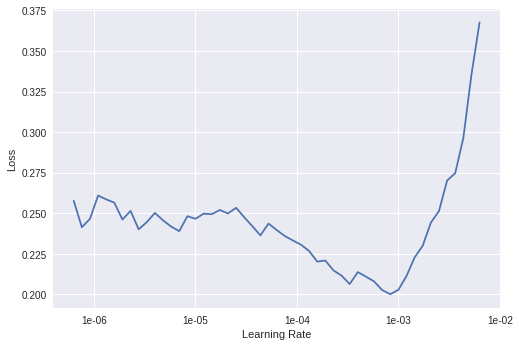

In [38]:
learn.recorder.plot()

In [0]:
epoch =2

#If you pass slice(start,end) then the first group's learning rate is start, the last is end, and the remaining are evenly geometrically spaced.
lr = slice(1e-4,1e-3) 

In [40]:
learn.fit_one_cycle(epoch, max_lr=lr)

epoch,train_loss,valid_loss,accuracy,time
1,0.285298,0.445909,0.856209,01:07
2,0.219038,0.262600,0.921569,01:02


In [0]:
learn.save('stage-1')

## Interpretation

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

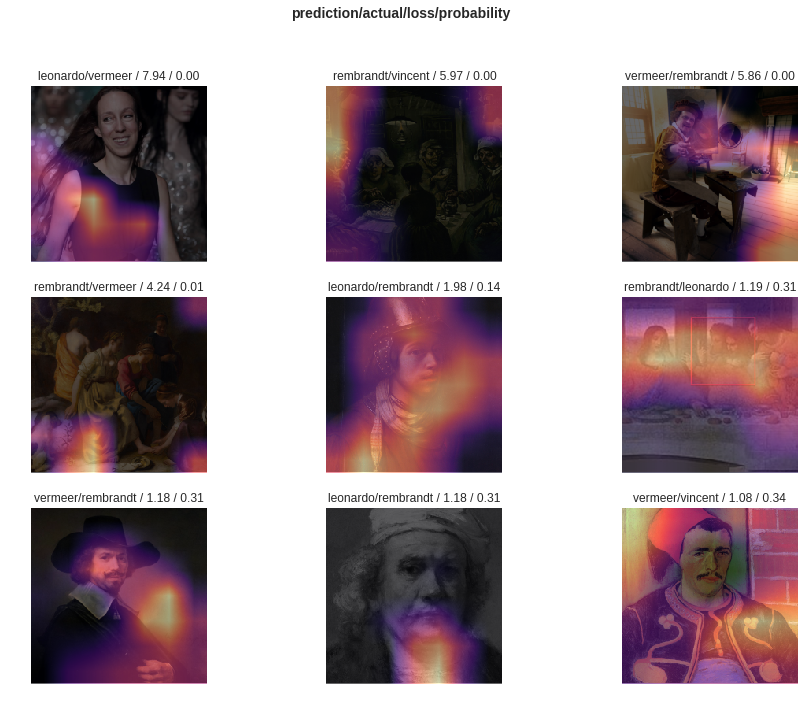

In [60]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=True)

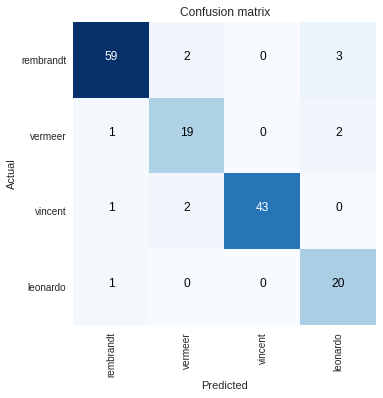

In [44]:
interp.plot_confusion_matrix()

In [45]:
interp.most_confused(min_val=2)

[('rembrandt', 'leonardo', 3),
 ('rembrandt', 'vermeer', 2),
 ('vermeer', 'leonardo', 2),
 ('vincent', 'vermeer', 2)]

In [54]:
interp.most_confused()

[('rembrandt', 'leonardo', 3),
 ('rembrandt', 'vermeer', 2),
 ('vermeer', 'leonardo', 2),
 ('vincent', 'vermeer', 2),
 ('vermeer', 'rembrandt', 1),
 ('vincent', 'rembrandt', 1),
 ('leonardo', 'rembrandt', 1)]

**Make some predictions**

In [47]:
data.classes

['rembrandt', 'vermeer', 'vincent', 'leonardo']

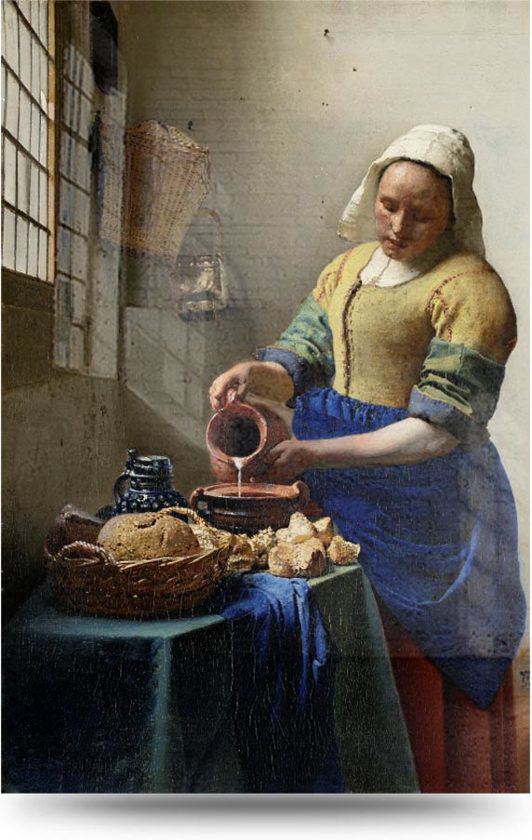

In [48]:
pic0 = open_image(Path('../content/test/vermeer.jpg'))
pic0

In [58]:
pred_class,pred_idx,outputs = learn.predict(pic0)
outputs, pred_idx, pred_class.obj

(tensor([1.6300e-04, 9.9971e-01, 9.9378e-06, 1.1958e-04]),
 tensor(1),
 'vermeer')

In [0]:
#please predict the following images
pic1 = open_image(Path('../content/test/nachtwacht.jpg'))
pic2 = open_image(Path('../content/test/zonnebloemen.jpg'))
pic3 = open_image(Path('../content/test/edmond-de-belamy-880.jpg'))